In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scale.utils import read_labels

### Reference celltypes

In [5]:
celltype = pd.read_csv('celltype.txt', sep='\t', index_col=0, header=None)[1] # Original celltypes
ref, classes = read_labels('celltype.txt') # LabelEncoder celltypes to category numbers

## Figure 4a

In [9]:
from scale.plot import plot_embedding

### Raw

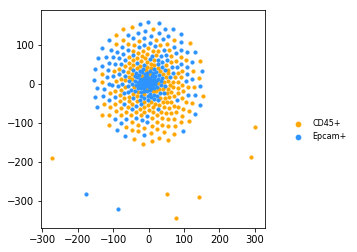

In [10]:
raw_tsne = np.loadtxt('Figure_4a/raw_tsne.txt')
plot_embedding(raw_tsne, celltype, colormap=['#FFA600','#2D93FF'])

### PCA

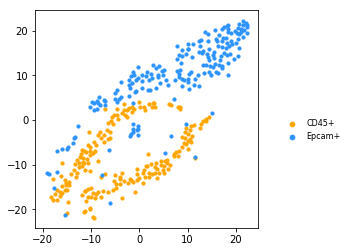

In [11]:
pca_tsne = np.loadtxt('Figure_4a/pca_tsne.txt')
plot_embedding(pca_tsne, celltype, colormap=['#FFA600','#2D93FF'])

### scVI

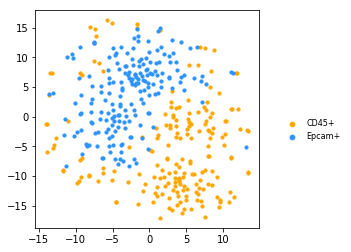

In [12]:
scvi_tsne = np.loadtxt('Figure_4a/scvi_tsne.txt')
plot_embedding(scvi_tsne, celltype, colormap=['#FFA600','#2D93FF'])

### SCALE

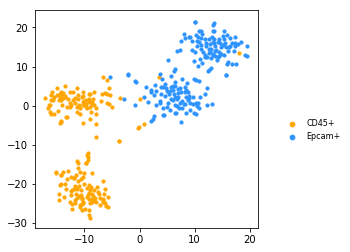

In [14]:
scale_tsne = np.loadtxt('Figure_4a/scale_tsne.txt')
plot_embedding(scale_tsne, celltype, colormap=['#FFA600','#2D93FF'])

## Figure 4b

In [2]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score
from scale.utils import reassign_cluster_with_ref
from scale.plot import plot_confusion_matrix

scABC ARI: 0.626  NMI: 0.518  F1: 0.896


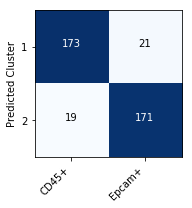

SC3 ARI: 0.000  NMI: 0.002  F1: 0.526


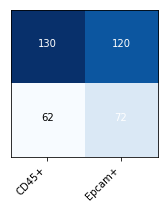

scVI ARI: 0.765  NMI: 0.678  F1: 0.938


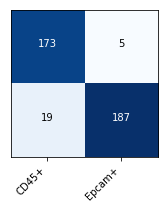

SCALE ARI: 0.918  NMI: 0.863  F1: 0.979


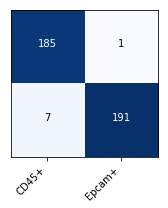

In [25]:
scABC_predict, _ = read_labels('Figure_4b/scABC_predict.txt')
SC3_predict, _ = read_labels('Figure_4b/SC3_predict.txt')
scVI_predict, _ = read_labels('Figure_4b/scVI_predict.txt')
SCALE_predict, _ = read_labels('Figure_4b/SCALE_predict.txt')

show_yticks=True
methods = ['scABC', 'SC3', 'scVI', 'SCALE']
for pred, method in zip([scABC_predict, SC3_predict, scVI_predict, SCALE_predict], methods):
    pred = reassign_cluster_with_ref(pred, ref)
    ari = adjusted_rand_score(ref, pred)
    nmi = normalized_mutual_info_score(ref, pred)
    f1 = f1_score(ref, pred, average='micro')
    print('{} ARI: {:.3f}  NMI: {:.3f}  F1: {:.3f}'.format(method, ari, nmi, f1))
    cm = confusion_matrix(pred, ref)
    plot_confusion_matrix(cm, x_classes=classes, y_classes=range(1,3), show_cbar=False, show_yticks=show_yticks, figsize=(3,3))
    show_yticks=False

## Figure 4c

In [22]:
import seaborn as sns
import matplotlib.patches as mpatches

In [20]:
TF_enrich = pd.read_csv('Figure_4c/TF_enrich_log10.txt', sep='\t', index_col=0)

immune_specific = ['ETS:RUNX', 'Egr1', 'Foxa3', 'GATA', 'IRF8', 'NFY', 'Klf9', 'KLF5', 'KLF6', 'KLF10',
                   'PU.1-IRF', 'PU.1:IRF8', 'Tbet', 'CEBP:CEBP', 'CRE', 'Atf2', 'Atf7',
                   'RUNX1', 'PU.1', 'SpiB', 'ELF5', 'RUNX',  'Elk4', 'Maz', 'ELF3']

breast_cancer = ['Ets1-distal', 'Nrf2', 'RUNX2', 'NRF', 'NRF1', 'KLF14', 'MITF', 'SPDEF',
                 'ETV4', 'EWS:FLI1-fusion', 'EWS:ERG-fusion', 'Bach2', 'E2F4']

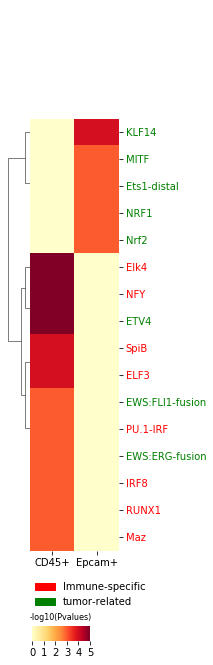

In [24]:
cbar_kws = {"orientation":'horizontal'}
g = sns.clustermap(TF_enrich, cmap='YlOrRd', yticklabels=True, figsize=(2,10),
               col_cluster=False, row_cluster=True,vmin=0, vmax=5, cbar_kws=cbar_kws)

for tick_label in g.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    if tick_text in immune_specific:
        tick_label.set_color('r')
    elif tick_text in breast_cancer:
        tick_label.set_color('g')
    else:
        tick_label.set_color('black')
        
legend_TN = [mpatches.Patch(color='r', label='Immune-specific'), mpatches.Patch(color='g', label='tumor-related')]
g.ax_heatmap.legend(loc='right', handles=legend_TN, bbox_to_anchor=(1.4, -0.1), frameon=False)
g.cax.set_position((0.3, -0., 0.4, 0.02))
g.cax.set_title('-log10(Pvalues)', rotation=0, fontsize=8)

plt.show()